In [2]:
import pandas as pd
import numpy as np
from seaborn import heatmap, PairGrid, kdeplot
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from utils import *

#### <u>Dataset for chl prediction</u>

In [3]:
df = pd.read_pickle('./pickleJar/df_3_ML4chl.pkl')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 495 entries, 0 to 494
Data columns (total 19 columns):
oisst            495 non-null float64
wt               158 non-null float64
sal              96 non-null float64
etopo2           495 non-null float64
sola             495 non-null float64
solz             495 non-null float64
sat_rho_rc412    495 non-null float64
sat_rho_rc443    495 non-null float64
sat_rho_rc490    495 non-null float64
sat_rho_rc510    495 non-null float64
sat_rho_rc555    495 non-null float64
sat_rho_rc670    495 non-null float64
datetime         495 non-null datetime64[ns]
lat              495 non-null float64
lon              495 non-null float64
chl_fluo         364 non-null float64
chl_hplc         158 non-null float64
chl              424 non-null float64
is_hplc          495 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(17)
memory usage: 74.0 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.780,13.775000,19.600000,25.120000,30.510000
wt,158.0,19.741563,7.176002,1.100,13.872500,18.990000,25.882500,36.250000
sal,96.0,31.294687,5.939344,9.580,29.197500,33.560000,34.342500,37.010000
etopo2,495.0,768.961616,1410.753061,0.000,20.500000,156.000000,519.000000,5529.000000
sola,495.0,188.826667,51.128164,0.000,182.750000,191.900000,204.100000,356.700000
solz,495.0,31.291919,14.525706,0.000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,495.0,0.006742,0.003876,0.000,0.003706,0.005988,0.008865,0.020979
sat_rho_rc443,495.0,0.007025,0.003640,0.000,0.004168,0.006625,0.008941,0.020130
sat_rho_rc490,495.0,0.007243,0.003453,0.000,0.004514,0.006866,0.009144,0.018906
sat_rho_rc510,495.0,0.006734,0.003350,0.000,0.004123,0.005819,0.008748,0.018512


In [53]:
sat_cols = df.filter(regex='sat').columns.tolist()

In [8]:
df.loc[df.sat_rho_rc412==0, sat_cols] = np.NaN

In [14]:
df[sat_cols] = df[sat_cols].replace(0.000, np.NaN)

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
oisst,495.0,19.066020,6.983298,0.780000,13.775000,19.600000,25.120000,30.510000
wt,158.0,19.741563,7.176002,1.100000,13.872500,18.990000,25.882500,36.250000
sal,96.0,31.294687,5.939344,9.580000,29.197500,33.560000,34.342500,37.010000
etopo2,495.0,768.961616,1410.753061,0.000000,20.500000,156.000000,519.000000,5529.000000
sola,495.0,188.826667,51.128164,0.000000,182.750000,191.900000,204.100000,356.700000
solz,495.0,31.291919,14.525706,0.000000,20.650000,32.300000,42.600000,69.900000
sat_rho_rc412,494.0,0.006756,0.003868,0.001360,0.003726,0.005999,0.008869,0.020979
sat_rho_rc443,494.0,0.007039,0.003629,0.001656,0.004210,0.006646,0.008943,0.020130
sat_rho_rc490,494.0,0.007258,0.003441,0.001897,0.004528,0.006869,0.009147,0.018906
sat_rho_rc510,494.0,0.006747,0.003339,0.001890,0.004140,0.005863,0.008762,0.018512


In [16]:
df.drop(['wt', 'sal'], axis=1, inplace=True)

In [17]:
df.iloc[174]

oisst                           29.9
etopo2                            42
sola                           210.8
solz                            20.3
sat_rho_rc412                    NaN
sat_rho_rc443                    NaN
sat_rho_rc490                    NaN
sat_rho_rc510                    NaN
sat_rho_rc555                    NaN
sat_rho_rc670                    NaN
datetime         2001-08-28 20:05:00
lat                           27.236
lon                          -83.469
chl_fluo                     0.14052
chl_hplc                         NaN
chl                          0.14052
is_hplc                        False
Name: 174, dtype: object

In [59]:
pca_1 = PCA() # for raw data
pca_2 = PCA() # for standardized data
pca_3 = PCA() # for band averaged data
pca_4 = PCA() # for band averaged standardized data
scaler2 = StandardScaler()
scaler4 = StandardScaler()
df_sat = df.filter(regex='sat').dropna()
data1 = df_sat.values
data2 = pd.DataFrame(scaler2.fit_transform(data1), columns=df_sat.columns)
data3 = df_sat.divide(df_sat.sum(axis=1), axis=0)
data4 = pd.DataFrame(scaler4.fit_transform(data3), columns=df_sat.columns)

In [18]:
df_sat.iloc[172:178]


NameError: name 'df_sat' is not defined

#### <u> PCA of raw data</u>

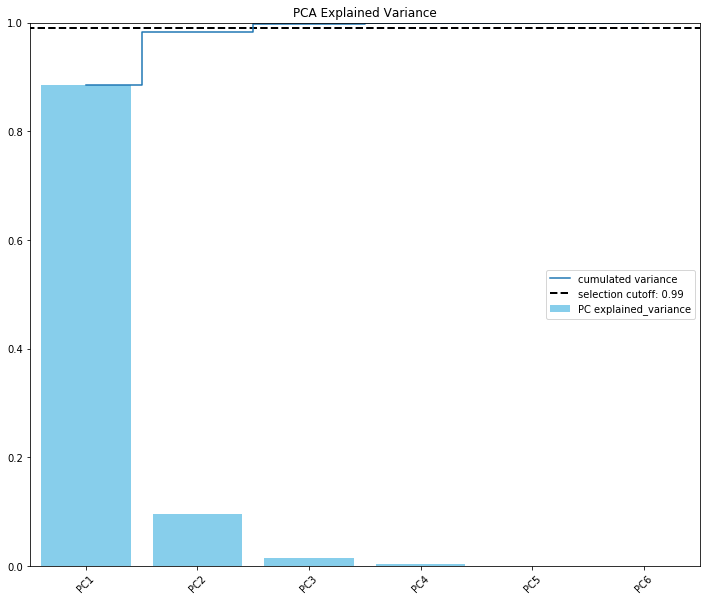

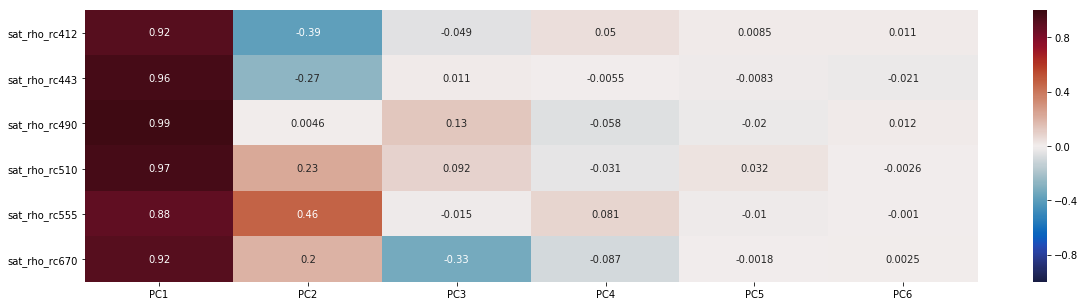

In [60]:
pca_data1 = pca_1.fit_transform(data1)
PlotPCARes(pca_1, threshold=0.99, alpha=0.9, num_pca_disp=pca_data1.shape[1])
PlotCrossCorr(pca_data1, df_sat)

#### PCA of standardized data

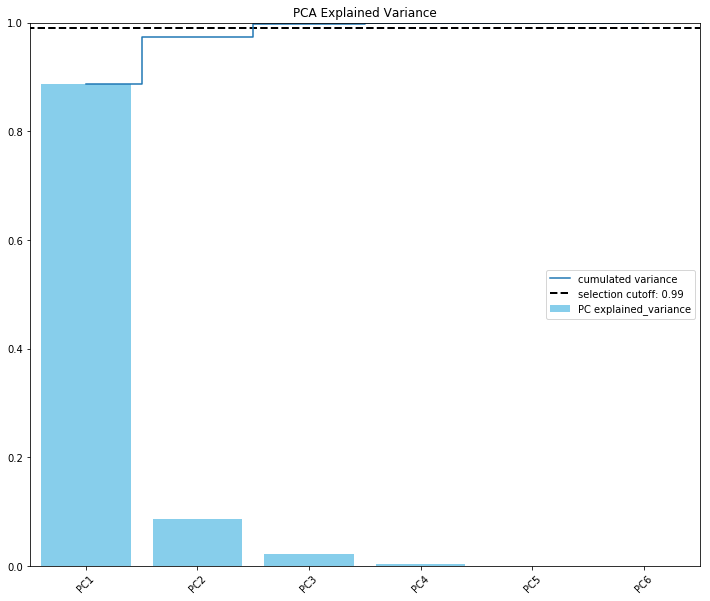

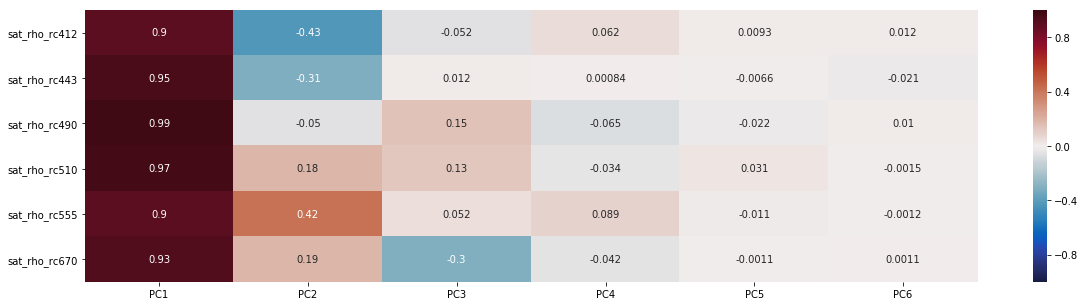

In [16]:
pca_data2 = pca_2.fit_transform(data2)
PlotPCARes(pca_2, threshold=0.99, alpha=0.9, num_pca_disp=pca_data2.shape[1])
PlotCrossCorr(pca_data2, data2)

#### <u> PCA of bandwise normalized data </u>

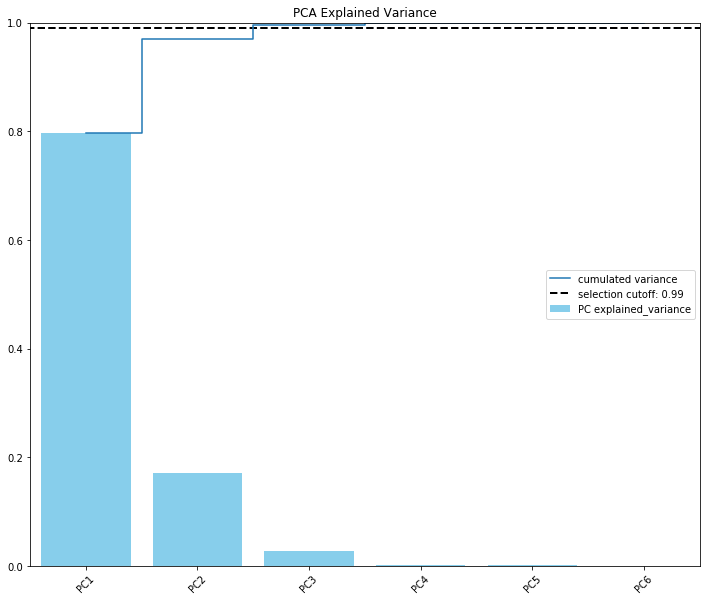

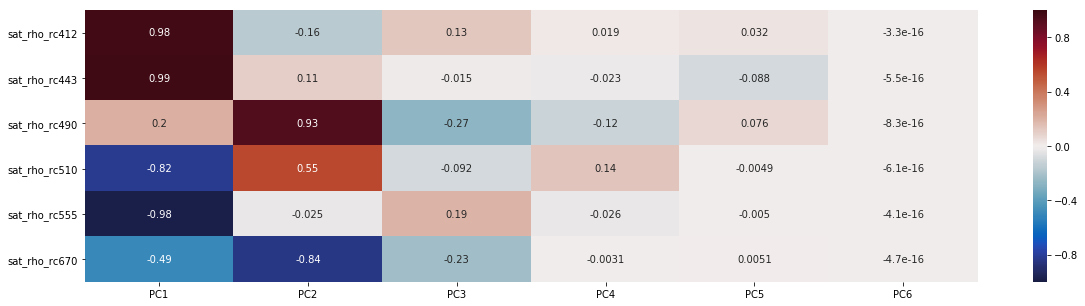

In [18]:
pca_data3 = pca_3.fit_transform(data3)
PlotPCARes(pca_3, threshold=0.99, alpha=0.9, num_pca_disp=pca_data3.shape[1])
PlotCrossCorr(pca_data3, data3)

#### <u> PCA of standardized bandwise normalized data</u>

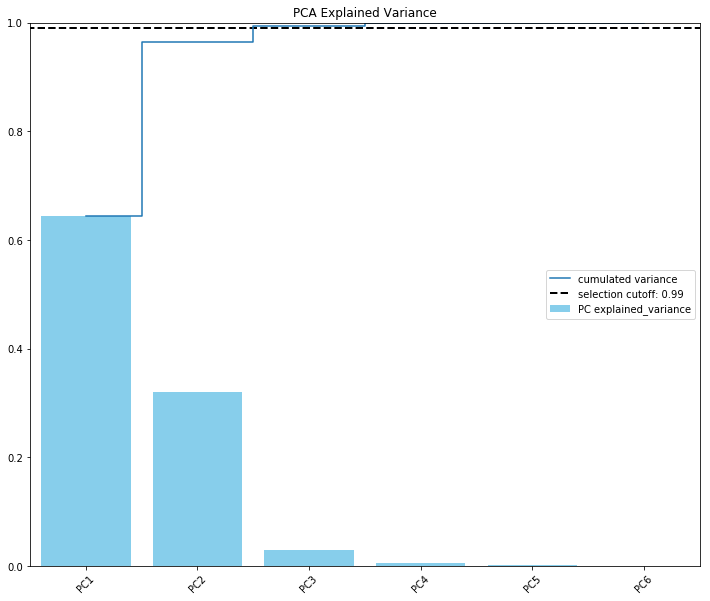

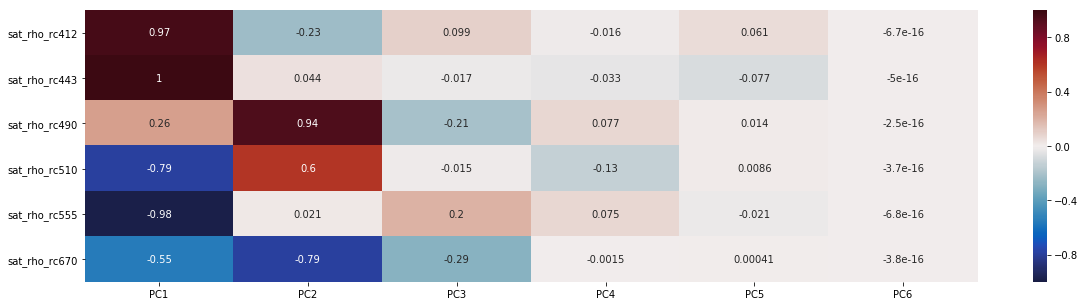

In [19]:
pca_data4 = pca_4.fit_transform(data4)
PlotPCARes(pca_4, threshold=0.99, alpha=0.9, num_pca_disp=pca_data4.shape[1])
PlotCrossCorr(pca_data4, data4)

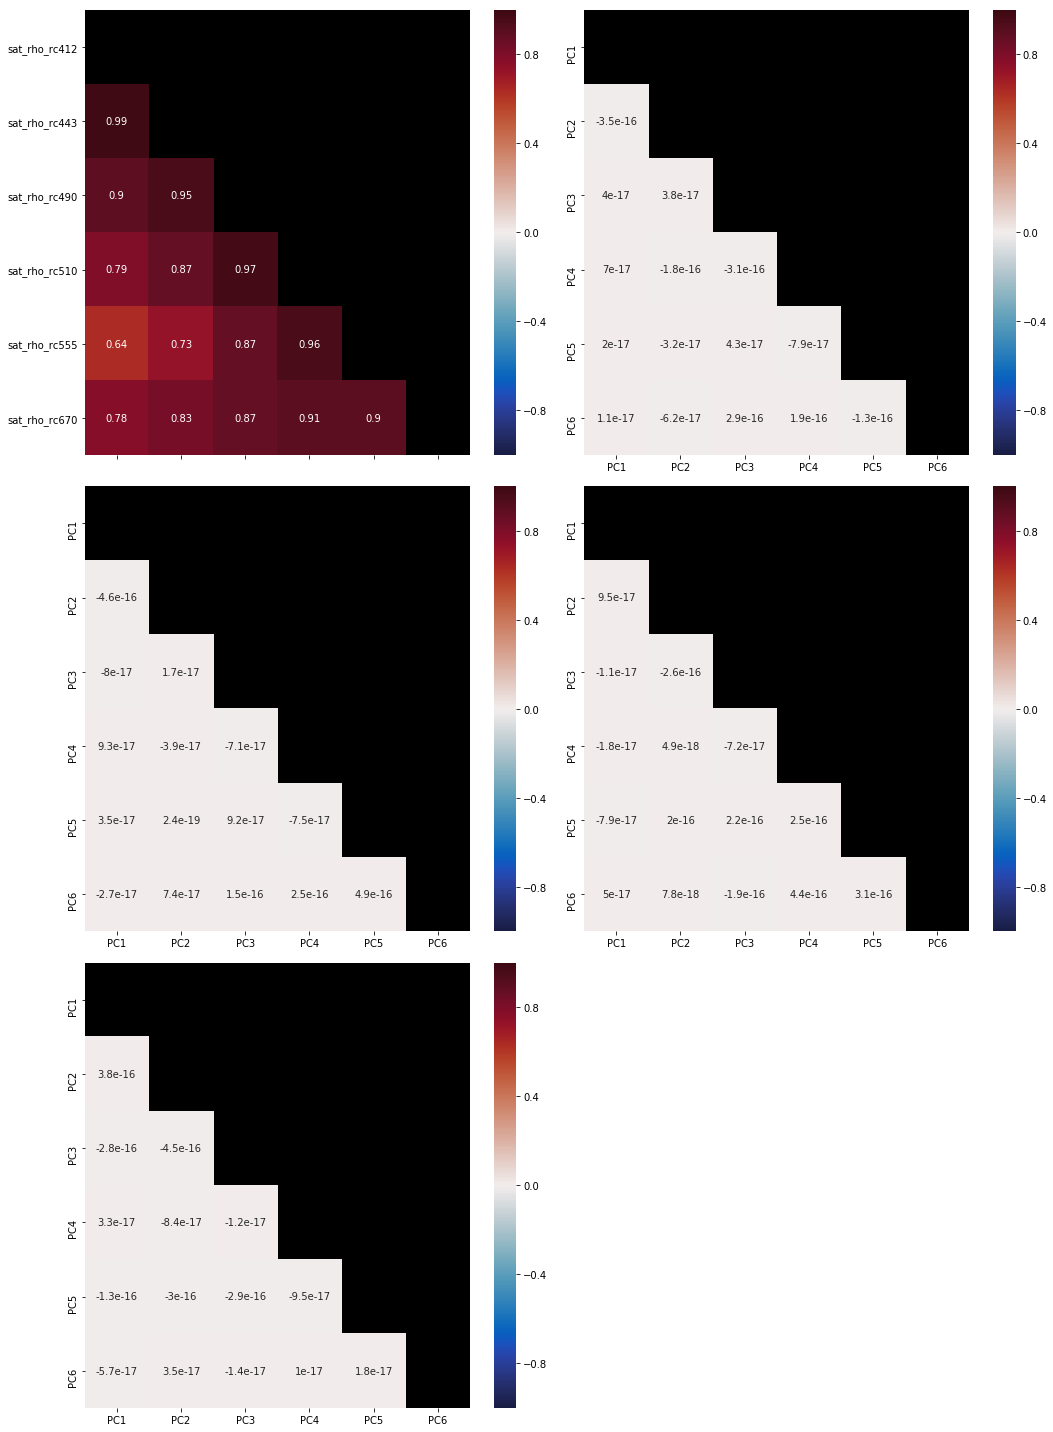

In [81]:
df_pca1 = pd.DataFrame(pca_data1, columns=['PC%d' %i for i in range(1, 7)],
                      index=df_sat.index)
df_pca2 = pd.DataFrame(pca_data2, columns=['PC%d' %i for i in range(1, 7)],
                      index=df_sat.index)
df_pca3 = pd.DataFrame(pca_data3, columns=['PC%d' %i for i in range(1, 7)],
                      index=df_sat.index)
df_pca4 = pd.DataFrame(pca_data4, columns=['PC%d' %i for i in range(1, 7)],
                      index=df_sat.index)
f, ax = pl.subplots(ncols=2, nrows=3, figsize=(15, 20))
ax = ax.ravel()
for axi in ax:
    axi.set_facecolor('black')
axi.set_visible(False)
heatmap(df_sat.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=ax[0])
heatmap(df_pca1.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=ax[1]);
heatmap(df_pca2.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=ax[2]);
heatmap(df_pca3.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=ax[3]);
heatmap(df_pca4.corr(), vmin=-1, vmax=1, cmap=cmo.balance, annot=True,
       mask=np.triu(np.ones([df_sat.shape[1]]*2)), ax=ax[4]);
ax[0].set_xticklabels(['']*6)
f.tight_layout()

I'm going to keep pca_data1, pca_data3 and pca_data4; I discard pca_data2 in this case the data is highly interdependent and describes specific water condition and I don't want to lose the information on this bandwise interconnection. I don't discard pca_data4 because band-wise normalization is done prior to standardization and I'm not sure yet what that means in terms of banwise interconnection. But first to reinsert previously discared NaN line to keep things in aligment

In [97]:
# reinserting Nan line 
df_pca1.loc[174] = [np.NaN] * 6
df_pca1.sort_index(inplace=True)
df_pca3.loc[174] = [np.NaN] * 6
df_pca3.sort_index(inplace=True)
df_pca4.loc[174] = [np.NaN] * 6
df_pca4.sort_index(inplace=True)

In [99]:
# verify
df_pca1.iloc[172:178]

,PC1,PC2,PC3,PC4,PC5,PC6
172,0.025258,-0.003908,-0.000042,0.000193,0.000166,-0.000015
173,0.026420,-0.003631,-0.000215,0.000183,0.000193,-0.000026
174,NaN,NaN,NaN,NaN,NaN,NaN
175,0.020661,-0.003175,-0.000335,0.000070,0.000051,0.000041
176,0.019813,-0.002192,-0.000166,-0.000135,0.000079,0.000019
177,0.020644,-0.001091,-0.000229,-0.000212,0.000130,0.000012


In [100]:
df_pca3.iloc[172:178]

,PC1,PC2,PC3,PC4,PC5,PC6
172,0.042179,-0.028720,-0.000202,0.003095,0.000890,2.003778e-17
173,0.038200,-0.030585,-0.000523,0.003317,0.000786,3.591620e-17
174,NaN,NaN,NaN,NaN,NaN,NaN
175,0.038593,-0.030481,-0.001518,0.001891,0.001331,-3.761385e-18
176,0.027936,-0.027678,-0.003713,0.002157,0.001255,3.873667e-17
177,0.014648,-0.028097,-0.004612,0.002626,0.001283,1.052328e-17


In [101]:
df_pca4.iloc[172:178]

,PC1,PC2,PC3,PC4,PC5,PC6
172,1.114433,-1.388799,-0.014723,-0.122936,0.057802,8.220427e-16
173,0.981323,-1.469185,-0.023707,-0.134720,0.056078,1.439563e-15
174,NaN,NaN,NaN,NaN,NaN,NaN
175,1.011259,-1.439822,-0.083376,-0.064300,0.061975,1.879183e-16
176,0.688596,-1.277201,-0.151626,-0.081089,0.060439,1.479791e-15
177,0.271050,-1.272280,-0.176438,-0.102131,0.064587,5.704460e-16


In [102]:
df_pca1.shape, df_pca3.shape, df_pca4.shape

((495, 6), (495, 6), (495, 6))

In [103]:
df_pca1.to_pickle('./pickleJar/df_4_pca_fromraw.pkl')
df_pca3.to_pickle('./pickleJar/df_4_pca3_frombwnorm.pkl')
df_pca4.to_pickle('./pickleJar/df_4_pca4_frombwnorm_stdizd.pkl')